# Initial

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics  
from sklearn.model_selection import KFold
from sklearn.tree import export_graphviz
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from pprint import pprint
from IPython.display import Image
from sklearn import svm
from scipy import stats 
import pydotplus

# for inline plots in jupyter
%matplotlib inline 

#removing warning messages CHECK THIS IF SOMETHING BREAKS!!!!!
pd.options.mode.chained_assignment = 'warn'  # default='warn'

data_path = "Marketing_Campaign_final.csv"

df = pd.read_csv(data_path)

Split the data set to X and y.<br>
X for the features and y for the target. 

In [2]:
X = df.drop('Response', axis=1)
y = df['Response']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

# Decision Tree Classifier

Create Decision Tree classifier object, train it on the train set and predict the labels to the test set.<br>

## Basic

In [4]:
clf = DecisionTreeClassifier(random_state=42) 

# Train Decision Tree Classifer 
clf = clf.fit(X_train,y_train)

# Predict the label
y_pred = clf.predict(X_test)

Acuuracy and confusion matrix:

In [5]:
print(metrics.accuracy_score(y_test, y_pred))
pd.DataFrame(metrics.confusion_matrix(y_test, y_pred))

0.8164251207729468


0   1
0  305  53
1   23  33

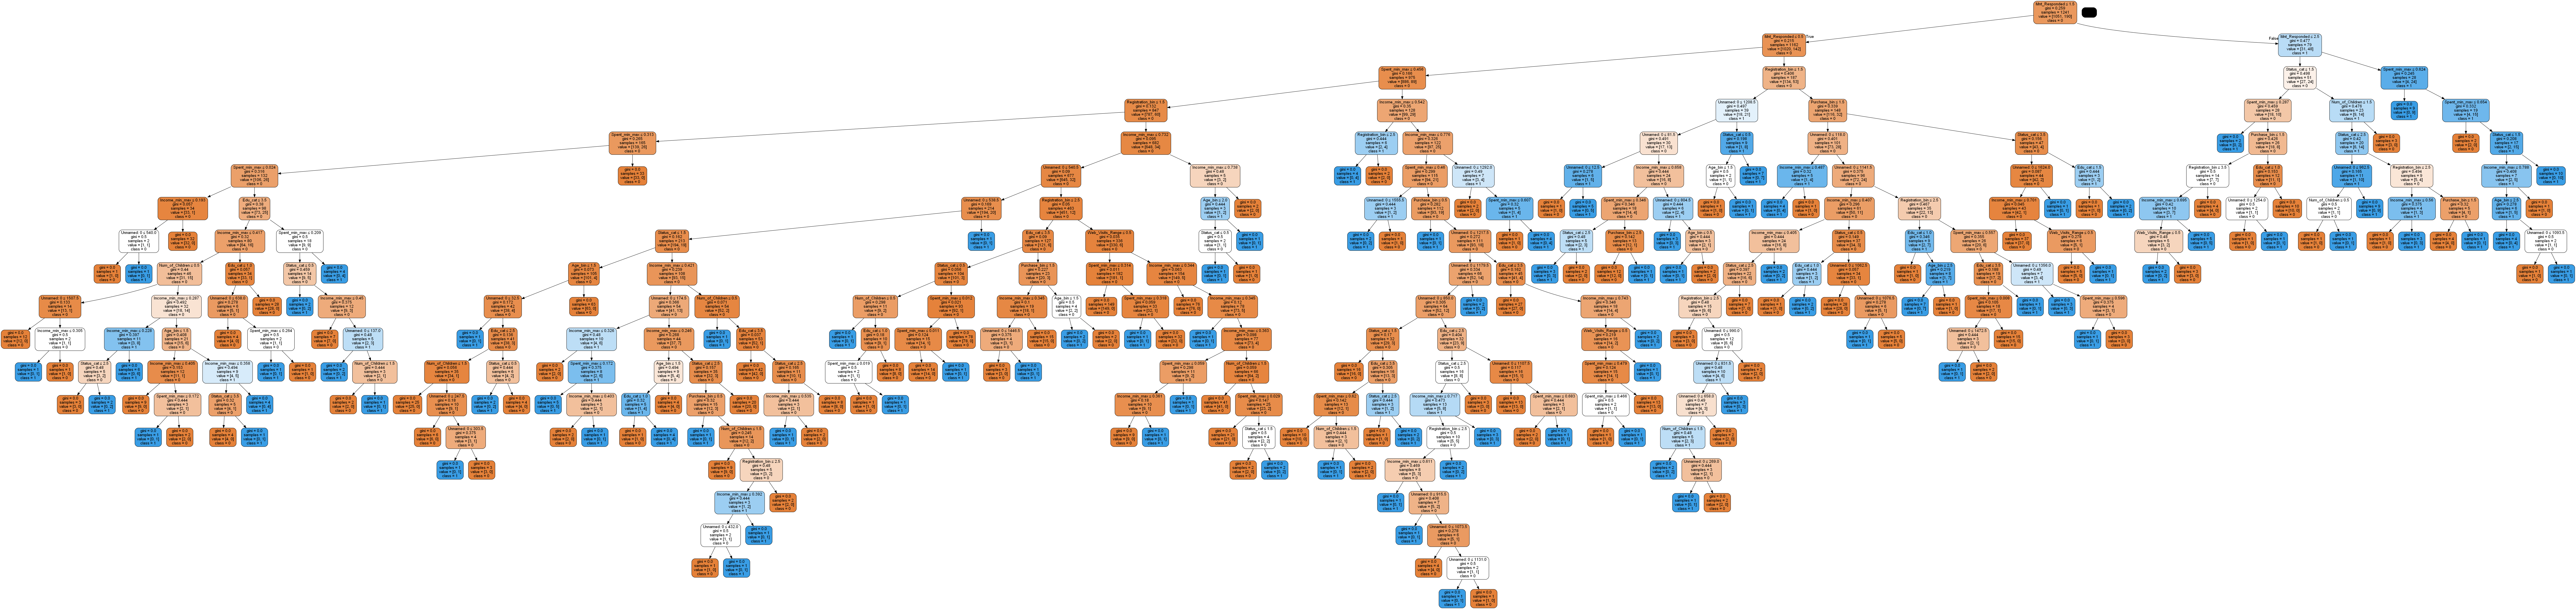

In [6]:
dot = export_graphviz(clf, filled=True, rounded=True, 
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot)  
graph.write_png('tree1.png')
Image(graph.create_png())

We have Overfitting

In [7]:
y_train_pred = clf.predict(X_train)
print(metrics.accuracy_score(y_train, y_train_pred))
pd.DataFrame(metrics.confusion_matrix(y_train, y_train_pred))

1.0


0    1
0  1051    0
1     0  190

## Solving overfitting with smaller trees

In [8]:
clf_dec = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=8,
                              min_samples_split=15, min_samples_leaf=5, random_state=42) 

clf_dec = clf_dec.fit(X_train,y_train)

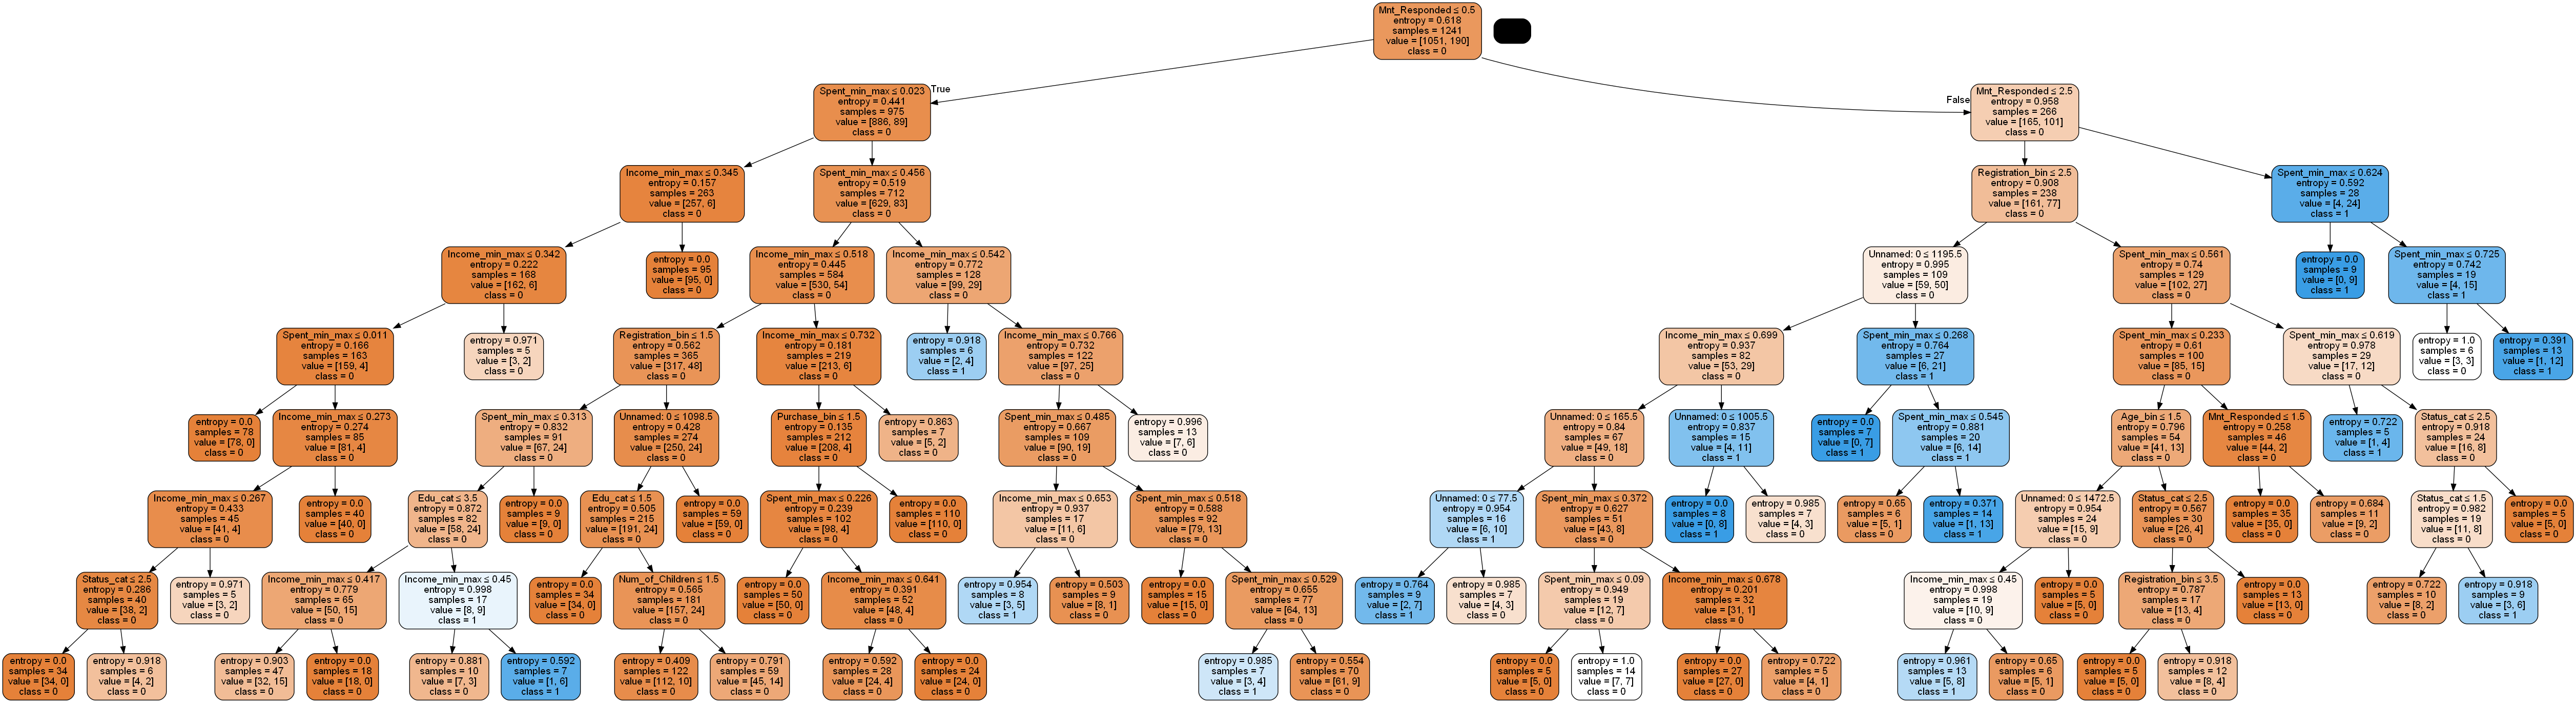

In [9]:
dot = export_graphviz(clf_dec, filled=True, rounded=True, 
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot)  
graph.write_png('tree2.png')
Image(graph.create_png())

In [10]:
y_train_pred_dec = clf_dec.predict(X_train)
print(metrics.accuracy_score(y_train, y_train_pred_dec))
pd.DataFrame(metrics.confusion_matrix(y_train, y_train_pred_dec))

0.9041095890410958


0   1
0  1029  22
1    97  93

In [11]:
y_pred_dec = clf_dec.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_dec))
pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_dec))

0.8429951690821256


0   1
0  335  23
1   42  14

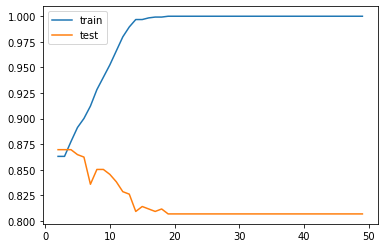

In [12]:
train_scores, test_scores = [],[]
for k in range(2,50):
    clf3 = DecisionTreeClassifier(criterion='entropy', splitter='best', 
                              max_depth=k, random_state=42) 
    clf3.fit(X_train,y_train)
    train_scores.append(clf3.score(X_train, y_train))
    test_scores.append(clf3.score(X_test, y_test))
plt.plot(range(2,50), train_scores)
plt.plot(range(2,50), test_scores)
plt.legend(['train','test'])
plt.show()

## ROC curve

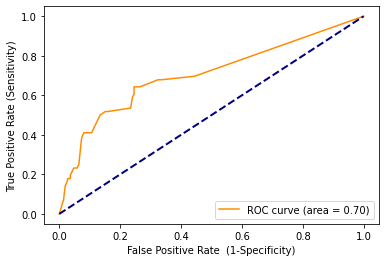

In [13]:
y_probs_dec = clf_dec.predict_proba(X_test) # probability prediction
fpr_dec, tpr_dec, threshold = metrics.roc_curve(y_test, y_probs_dec[:,1])
auc_dec = metrics.auc(fpr_dec, tpr_dec)
plt.figure()
plt.plot(fpr_dec, tpr_dec, color='darkorange', label='ROC curve (area = %0.2f)' %  auc_dec)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate  (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()

# Dummies

In [14]:
dummies_col = [col for col in df if len(df[col].unique()) > 2 and len(df[col].unique()) < 8]
X_dummies = pd.get_dummies(data = X, columns = dummies_col )
X_dummies.head()

Unnamed: 0  Complain  Income_min_max  Spent_min_max  Num_of_Children_0.0  \
0           1       0.0        0.071786       0.001190                    1   
1           2       0.0        0.123979       0.068651                    1   
2           3       0.0        0.615261       0.427381                    0   
3           6       0.0        0.090789       0.001587                    0   
4           7       0.0        0.479257       0.338889                    0   

   Num_of_Children_1.0  Num_of_Children_2.0  Num_of_Children_3.0  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    1                    0   
3                    0                    1                    0   
4                    0                    1                    0   

   Purchase_bin_0.0  Purchase_bin_1.0  ...  Edu_cat_3  Edu_cat_4  Age_bin_0.0  \
0                 0                 1  ...          0          0            0   
1                 0                 1  ...          0          0            0   
2                 0                 0  ...          0          0            0   
3                 0                 1  ...          0          1            0   
4                 0                 0  ...          1          0            0   

   Age_bin_1.0  Age_bin_2.0  Age_bin_3.0  Registration_bin_1.0  \
0            0            1            0                     0   
1            1            0            0                     1   
2            0            1            0                     0   
3            0            1            0                     0   
4            0            1            0                     0   

   Registration_bin_2.0  Registration_bin_3.0  Registration_bin_4.0  
0                     0                     0                     1  
1                     0                     0                     0  
2                     1                     0                     0  
3                     0                     0                     1  
4                     1                     0                     0  

[5 rows x 39 columns]

In [15]:
X_train_d, X_test_d, y_train, y_test = train_test_split(X_dummies, y, test_size=0.25, random_state=42) 

In [16]:
clf_d = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=8,
                              min_samples_split=15, min_samples_leaf=5, random_state=42) 

clf_d = clf_d.fit(X_train_d,y_train)

In [17]:
y_train_pre_d = clf_d.predict(X_train_d)
print(metrics.accuracy_score(y_train, y_train_pre_d))
pd.DataFrame(metrics.confusion_matrix(y_train, y_train_pre_d))

0.9016921837228042


0   1
0  1020  31
1    91  99

In [18]:
y_pred_d = clf_d.predict(X_test_d)
print(metrics.accuracy_score(y_test, y_pred_d))
pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_d))

0.8454106280193237


0   1
0  331  27
1   37  19

Dummies values are slightly closer so they're better, but not by a substantial amount

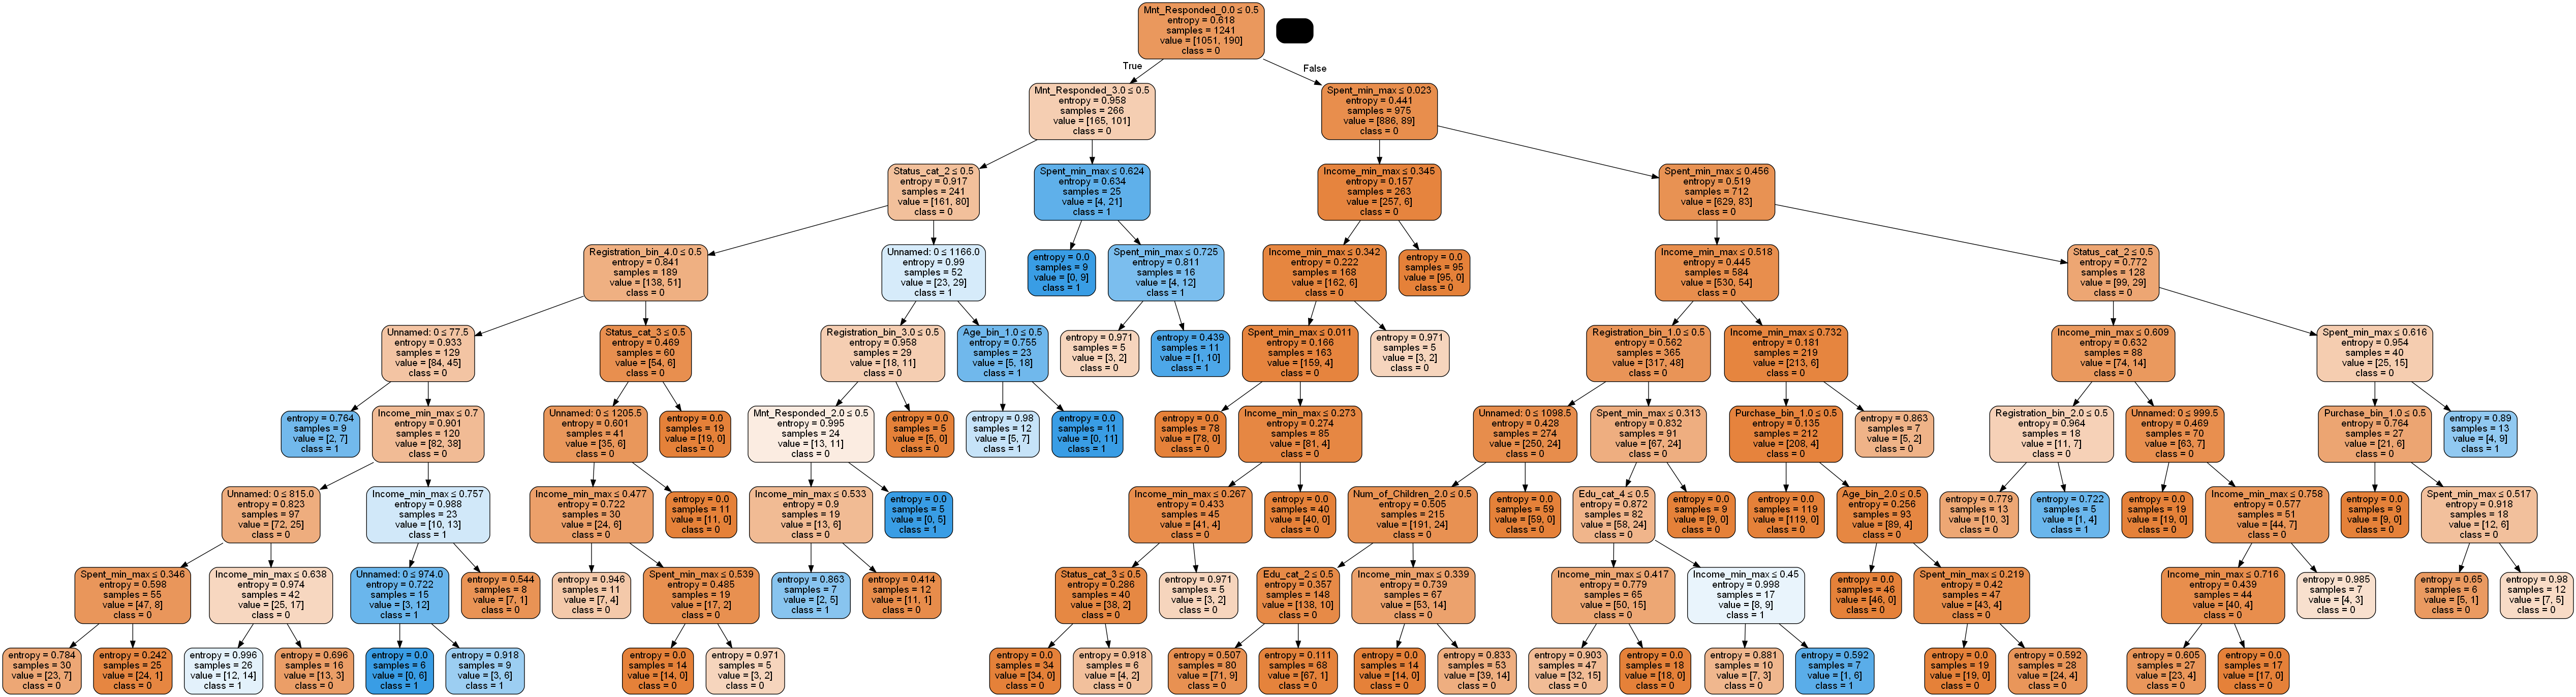

In [19]:
dot = export_graphviz(clf_d, filled=True, rounded=True, 
                special_characters=True,feature_names = X_dummies.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot)  
graph.write_png('tree3.png')
Image(graph.create_png())

In [20]:
X = X.to_numpy()
X_dummies = X_dummies.to_numpy()

In [21]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cm_reg, cm_d = [],[]
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    X_train_d, X_test_d = X_dummies[train_index], X_dummies[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_dec.fit(X_train,y_train)
    clf_d.fit(X_train_d,y_train)
    y_pred_a = clf_dec.predict(X_test)
    y_pred_b = clf_d.predict(X_test_d)
    cm_reg.append(metrics.confusion_matrix(y_test, y_pred_a))
    cm_d.append(metrics.confusion_matrix(y_test, y_pred_b))

## Accuracy


In [22]:
acc_a = [(cm[0][0]+cm[1][1])/sum(sum(cm)) for cm in cm_reg]
np.mean(acc_a)

0.8429003021148036

In [23]:
acc_b = [(cm[0][0]+cm[1][1])/sum(sum(cm)) for cm in cm_d]
np.mean(acc_b)

0.8453172205438065

## Recall

In [24]:
recall_a = [(cm[1][1]/(cm[1][1]+cm[0][1])) for cm in cm_reg]
#recall_a
np.mean(recall_a)

0.46431416378784796

In [25]:
recall_b = [(cm[1][1]/(cm[1][1]+cm[0][1])) for cm in cm_d]
#recall_b
np.mean(recall_b)

0.476023763470572

# SVM classifier

In [26]:
clf_svm = svm.SVC(kernel='rbf', C=0.9, probability=True)
clf_svm.fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)
print(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)))
print(metrics.classification_report(y_test,y_pred))

     0  1
0  280  0
1   51  0
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       280
           1       0.00      0.00      0.00        51

    accuracy                           0.85       331
   macro avg       0.42      0.50      0.46       331
weighted avg       0.72      0.85      0.78       331



d:\Documents\University\Year_4\2nd Semester\Data mining\HW\datamine\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Documents\University\Year_4\2nd Semester\Data mining\HW\datamine\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Documents\University\Year_4\2nd Semester\Data mining\HW\datamine\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

### ROC curve

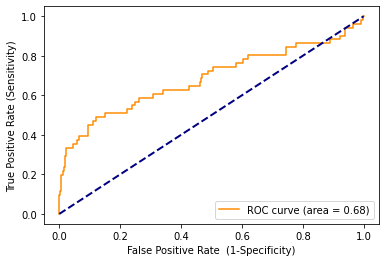

In [27]:
y_probs_svm = clf_svm.predict_proba(X_test) # probability prediction
fpr_svm, tpr_svm, threshold = metrics.roc_curve(y_test, y_probs_svm[:,1])
auc_svm = metrics.auc(fpr_svm, tpr_svm)
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', label='ROC curve (area = %0.2f)' %  auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate  (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()

# Naive Bayes classifier 

In [28]:
clf_NBayes = GaussianNB()
clf_NBayes.fit(X_train, y_train)
y_pred = clf_NBayes.predict(X_test)
display(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)))
print(metrics.classification_report(y_test,y_pred))

0   1
0  216  64
1   22  29

              precision    recall  f1-score   support

           0       0.91      0.77      0.83       280
           1       0.31      0.57      0.40        51

    accuracy                           0.74       331
   macro avg       0.61      0.67      0.62       331
weighted avg       0.82      0.74      0.77       331



## roc curve

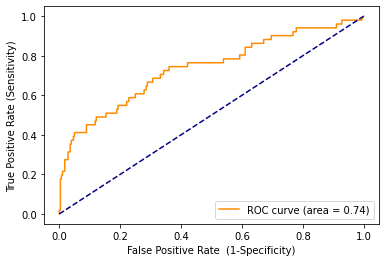

In [29]:
y_probs_NBayes = clf_NBayes.predict_proba(X_test) # probability prediction
fpr_NBayes, tpr_NBayes, _ = metrics.roc_curve(y_test, y_probs_NBayes[:,1])
auc_NBayes = metrics.auc(fpr_NBayes, tpr_NBayes)
plt.figure()
plt.plot(fpr_NBayes, tpr_NBayes, color='darkorange', label='ROC curve (area = %0.2f)' %  auc_NBayes)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate  (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()

# Random Forest classifier

In [30]:
rf = RandomForestClassifier(random_state = 42)

In [31]:
rf.fit(X_train, y_train)
y_pred = clf_NBayes.predict(X_test)
display(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)))
print(metrics.classification_report(y_test,y_pred))

0   1
0  216  64
1   22  29

              precision    recall  f1-score   support

           0       0.91      0.77      0.83       280
           1       0.31      0.57      0.40        51

    accuracy                           0.74       331
   macro avg       0.61      0.67      0.62       331
weighted avg       0.82      0.74      0.77       331



## ROC curve

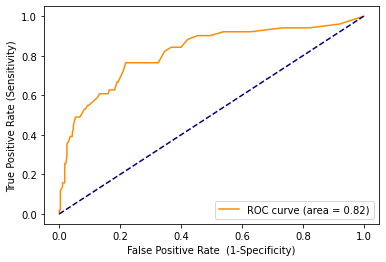

In [32]:
y_probs_rf = rf.predict_proba(X_test) # probability prediction
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test, y_probs_rf[:,1])
auc_rf = metrics.auc(fpr_rf, tpr_rf)
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', label='ROC curve (area = %0.2f)' %  auc_rf)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate  (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()

# Comparing Clasifiers

### ROC

show ROC curve comparisson, naive bayes is better than SVM at all points

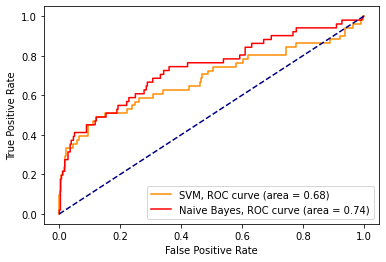

In [33]:
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', label='SVM, ROC curve (area = %0.2f)' %  auc_svm)
plt.plot(fpr_NBayes, tpr_NBayes, color='red', label='Naive Bayes, ROC curve (area = %0.2f)' %  auc_NBayes)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

## Cross Validation

In [34]:
clf_list = [clf_svm,clf_NBayes]
cm_dict, auc_dict = {}, {}
kf = KFold(n_splits=10, shuffle=True, random_state=42) #for cross validation
k = 0
for train_index, test_index in kf.split(X):
    k+=1
    print("------",k,"------")
    # split to train and test
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    for clf in clf_list:
        # train the model and make a prediction
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        cm = metrics.confusion_matrix(y_test, y_pred)
        y_probs = clf.predict_proba(X_test) # probability prediction
        fpr, tpr, _ = metrics.roc_curve(y_test, y_probs[:,1])
        auc = metrics.auc(fpr, tpr)
        # save the results
        cm_list = cm_dict.get(clf,[])
        cm_list.append(cm)
        cm_dict[clf] = cm_list
        auc_list = auc_dict.get(clf,[])
        auc_list.append(auc)
        auc_dict[clf] = auc_list
        # print the results
        print("Classifier: ", clf)
        print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

------ 1 ------
Classifier:  SVC(C=0.9, probability=True)
Accuracy:  0.8855421686746988
Classifier:  GaussianNB()
Accuracy:  0.8614457831325302
------ 2 ------
Classifier:  SVC(C=0.9, probability=True)
Accuracy:  0.8554216867469879
Classifier:  GaussianNB()
Accuracy:  0.8674698795180723
------ 3 ------
Classifier:  SVC(C=0.9, probability=True)
Accuracy:  0.8614457831325302
Classifier:  GaussianNB()
Accuracy:  0.8373493975903614
------ 4 ------
Classifier:  SVC(C=0.9, probability=True)
Accuracy:  0.8373493975903614
Classifier:  GaussianNB()
Accuracy:  0.8373493975903614
------ 5 ------
Classifier:  SVC(C=0.9, probability=True)
Accuracy:  0.8132530120481928
Classifier:  GaussianNB()
Accuracy:  0.8132530120481928
------ 6 ------
Classifier:  SVC(C=0.9, probability=True)
Accuracy:  0.8424242424242424
Classifier:  GaussianNB()
Accuracy:  0.8121212121212121
------ 7 ------
Classifier:  SVC(C=0.9, probability=True)
Accuracy:  0.8848484848484849
Classifier:  GaussianNB()
Accuracy:  0.903030303

### avg results


In [35]:
acc_dict = {}
recall_dict = {}
for clf in clf_list:
    print(clf)
    acc = [(cm[0][0]+cm[1][1])/sum(sum(cm)) for cm in cm_dict[clf]]
    acc_dict[clf] = acc 
    print("mean accuracy: ", np.mean(acc))
    recall = [(cm[1][1])/(cm[1][1]+cm[1][0]) for cm in cm_dict[clf]]
    recall_dict[clf] = recall
    print("mean recall: ", np.mean(recall))
    print("mean AUC: ", np.mean(auc_dict[clf]))

SVC(C=0.9, probability=True)
mean accuracy:  0.8513618108798833
mean recall:  0.0
mean AUC:  0.598676681033975
GaussianNB()
mean accuracy:  0.8325958378970428
mean recall:  0.45997985645416806
mean AUC:  0.7538813606058838


## Null hypothesis

checking if GNB is better than SVM

In [36]:
ttest,pval = stats.ttest_rel(acc_dict[clf_svm], acc_dict[clf_NBayes],alternative = 'less')
print("p-value:" , pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value: 0.9568666685731047
accept null hypothesis


In [37]:
ttest,pval = stats.ttest_rel(recall_dict[clf_svm], recall_dict[clf_NBayes],alternative = 'less')
print("p-value:" , pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value: 1.2348510036428458e-08
reject null hypothesis


In [38]:
ttest,pval = stats.ttest_rel(auc_dict[clf_svm], auc_dict[clf_NBayes],alternative = 'less')
print("p-value:" , pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value: 0.00017426011592995084
reject null hypothesis


Result - they are the same except for the accuracy

# Gradient Boosting Classifier

## Stats

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
clf_GBoost = GradientBoostingClassifier(random_state=42)
clf_GBoost.fit(X_train, y_train)
y_pred = clf_GBoost.predict(X_test)
display(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)))
print(metrics.classification_report(y_test,y_pred))

0  1
0  135  3
1   19  8

              precision    recall  f1-score   support

           0       0.88      0.98      0.92       138
           1       0.73      0.30      0.42        27

    accuracy                           0.87       165
   macro avg       0.80      0.64      0.67       165
weighted avg       0.85      0.87      0.84       165



In [41]:
y_train_pred = clf_GBoost.predict(X_train)
print(metrics.accuracy_score(y_train, y_train_pred))
pd.DataFrame(metrics.confusion_matrix(y_train, y_train_pred))

0.9248322147651007


0    1
0  1266    5
1   107  112

In [42]:
y_pred = clf_GBoost.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
pd.DataFrame(metrics.confusion_matrix(y_test, y_pred))

0.8666666666666667


0  1
0  135  3
1   19  8

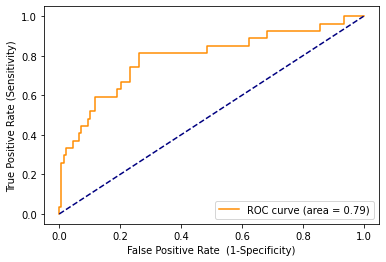

In [43]:
y_probs_boost = clf_GBoost.predict_proba(X_test) # probability prediction
fpr_boost, tpr_boost, _ = metrics.roc_curve(y_test, y_probs_boost[:,1])
auc_boost = metrics.auc(fpr_boost, tpr_boost)
plt.figure()
plt.plot(fpr_boost, tpr_boost, color='darkorange', label='ROC curve (area = %0.2f)' %  auc_boost)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate  (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()

# Comparison with others

### Roc

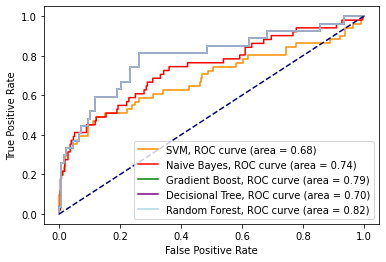

In [44]:
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', label='SVM, ROC curve (area = %0.2f)' %  auc_svm)
plt.plot(fpr_NBayes, tpr_NBayes, color='red', label='Naive Bayes, ROC curve (area = %0.2f)' %  auc_NBayes)
plt.plot(fpr_boost, tpr_boost, color='green', label='Gradient Boost, ROC curve (area = %0.2f)' %  auc_boost)
plt.plot(fpr_boost, tpr_boost, color='purple', label='Decisional Tree, ROC curve (area = %0.2f)' %  auc_dec)
plt.plot(fpr_boost, tpr_boost, color='lightblue', label='Random Forest, ROC curve (area = %0.2f)' %  auc_rf)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [45]:
clf_list = [clf_GBoost,clf_NBayes,clf_svm]
cm_dict, auc_dict = {}, {}
kf = KFold(n_splits=10, shuffle=True, random_state=42) #for cross validation
k = 0
for train_index, test_index in kf.split(X):
    k+=1
    print("------",k,"------")
    # split to train and test
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    for clf in clf_list:
        # train the model and make a prediction
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        cm = metrics.confusion_matrix(y_test, y_pred)
        y_probs = clf.predict_proba(X_test) # probability prediction
        fpr, tpr, _ = metrics.roc_curve(y_test, y_probs[:,1])
        auc = metrics.auc(fpr, tpr)
        # save the results
        cm_list = cm_dict.get(clf,[])
        cm_list.append(cm)
        cm_dict[clf] = cm_list
        auc_list = auc_dict.get(clf,[])
        auc_list.append(auc)
        auc_dict[clf] = auc_list
        # print the results
        print("Classifier: ", clf)
        print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

------ 1 ------
Classifier:  GradientBoostingClassifier(random_state=42)
Accuracy:  0.9096385542168675
Classifier:  GaussianNB()
Accuracy:  0.8614457831325302
Classifier:  SVC(C=0.9, probability=True)
Accuracy:  0.8855421686746988
------ 2 ------
Classifier:  GradientBoostingClassifier(random_state=42)
Accuracy:  0.8795180722891566
Classifier:  GaussianNB()
Accuracy:  0.8674698795180723
Classifier:  SVC(C=0.9, probability=True)
Accuracy:  0.8554216867469879
------ 3 ------
Classifier:  GradientBoostingClassifier(random_state=42)
Accuracy:  0.8855421686746988
Classifier:  GaussianNB()
Accuracy:  0.8373493975903614
Classifier:  SVC(C=0.9, probability=True)
Accuracy:  0.8614457831325302
------ 4 ------
Classifier:  GradientBoostingClassifier(random_state=42)
Accuracy:  0.8855421686746988
Classifier:  GaussianNB()
Accuracy:  0.8373493975903614
Classifier:  SVC(C=0.9, probability=True)
Accuracy:  0.8373493975903614
------ 5 ------
Classifier:  GradientBoostingClassifier(random_state=42)
Acc

### avg

In [46]:
acc_dict = {}
recall_dict = {}
for clf in clf_list:
    print(clf)
    acc = [(cm[0][0]+cm[1][1])/sum(sum(cm)) for cm in cm_dict[clf]]
    acc_dict[clf] = acc 
    print("mean accuracy: ", np.mean(acc))
    recall = [(cm[1][1])/(cm[1][1]+cm[1][0]) for cm in cm_dict[clf]]
    recall_dict[clf] = recall
    print("mean recall: ", np.mean(recall))
    print("mean AUC: ", np.mean(auc_dict[clf]))

GradientBoostingClassifier(random_state=42)
mean accuracy:  0.8779225994888646
mean recall:  0.3287551811284003
mean AUC:  0.8266266147500954
GaussianNB()
mean accuracy:  0.8325958378970428
mean recall:  0.45997985645416806
mean AUC:  0.7538813606058838
SVC(C=0.9, probability=True)
mean accuracy:  0.8513618108798833
mean recall:  0.0
mean AUC:  0.5990871797027093


### Null Hypothesis

checking if gradient boost is worse than GNB

In [47]:
ttest,pval = stats.ttest_rel(acc_dict[clf_GBoost], acc_dict[clf_NBayes],alternative = 'less')
print("p-value:" , pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value: 0.9988092044784679
accept null hypothesis


In [48]:
ttest,pval = stats.ttest_rel(recall_dict[clf_GBoost], recall_dict[clf_NBayes],alternative = 'less')
print("p-value:" , pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value: 0.0005092832047291002
reject null hypothesis


In [49]:
ttest,pval = stats.ttest_rel(auc_dict[clf_GBoost], auc_dict[clf_NBayes],alternative = 'less')
print("p-value:" , pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value: 0.9999936521193521
accept null hypothesis


In [50]:
clf_GBoost.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [51]:
clf_GBoost.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

# Hyperparameter Tuning

## Random Search

### Random Forest

In [52]:
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [53]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 15)]

max_features = ['auto', 'log2', 2, 5, 7]

max_depth = [int(x) for x in range(2, 8)]
max_depth.append(None)

min_samples_split = [2, 5, 10, 15, 20]

min_samples_leaf = [1, 3, 5, 10, 15]

max_samples = [0.1, 0.3, 0.5, 0.7]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_samples': max_samples}

In [54]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5,
                                verbose=2, random_state = 42, n_jobs = -1)

rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, None],
                                        'max_features': ['auto', 'log2', 2, 5,
                                                         7],
                                        'max_samples': [0.1, 0.3, 0.5, 0.7],
                                        'min_samples_leaf': [1, 3, 5, 10, 15],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [10, 80, 151, 222, 292,
                                                         363, 434, 504, 575,
                                                         646, 717, 787, 858,
                                                         929, 1000]},
                   random_state=42, verbose=2)

In [55]:
rf_random.best_params_

{'n_estimators': 858,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_samples': 0.5,
 'max_features': 2,
 'max_depth': 4}

In [56]:
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
rf_accuracy = metrics.accuracy_score(y_test, rf_y_pred)
print('base model accuracy = {:0.2f}%'.format(rf_accuracy*100))

best_random = rf_random.best_estimator_
random_y_pred = best_random.predict(X_test)
random_accuracy = metrics.accuracy_score(y_test, random_y_pred)
print('random model accuracy = {:0.2f}%'.format(random_accuracy*100))

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - rf_accuracy) / rf_accuracy))

base model accuracy = 87.88%
random model accuracy = 83.64%
Improvement of -4.83%.


#### depth comparisson

In [57]:
random_depth = [best_random.estimators_[i].get_depth() for i in range(best_random.get_params()['n_estimators'])]
print('Random max depth: ', max(random_depth))
print('Random min depth: ', min(random_depth))

Random max depth:  4
Random min depth:  4


In [58]:
rf_depth = [rf.estimators_[i].get_depth() for i in range(rf.get_params()['n_estimators'])]
print('Base max depth: ', max(rf_depth))
print('Base min depth: ', min(rf_depth))

Base max depth:  22
Base min depth:  14


### Naive Bayes

In [59]:
clf_NBayes.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [60]:
var_smoothing = np.linspace(10^-10,10^-8,100)
nb_grid = {'var_smoothing':var_smoothing}

In [61]:
nb_random = RandomizedSearchCV(estimator = clf_NBayes, param_distributions = nb_grid, n_iter = 100, cv = 5,
                                verbose=2, random_state = 42, n_jobs = -1)

nb_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=GaussianNB(), n_iter=100, n_jobs=-1,
                   param_distributions={'var_smoothing': array([ -4.        ,  -4.1010101 ,  -4.2020202 ,  -4.3030303 ,
        -4.4040404 ,  -4.50505051,  -4.60606061,  -4.70707071,
        -4.80808081,  -4.90909091,  -5.01010101,  -5.11111111,
        -5.21212121,  -5.31313131,  -5.41414141,  -5.51515152,
        -5.61616162,  -5.71717172,  -5.81818182,  -5.91919192,
        -6.0202020...
       -11.27272727, -11.37373737, -11.47474747, -11.57575758,
       -11.67676768, -11.77777778, -11.87878788, -11.97979798,
       -12.08080808, -12.18181818, -12.28282828, -12.38383838,
       -12.48484848, -12.58585859, -12.68686869, -12.78787879,
       -12.88888889, -12.98989899, -13.09090909, -13.19191919,
       -13.29292929, -13.39393939, -13.49494949, -13.5959596 ,
       -13.6969697 , -13.7979798 , -13.8989899 , -14.        ])},
                   random_state=42, verbose=2)

In [62]:
nb_random.best_params_

{'var_smoothing': -4.0}

In [63]:
clf_NBayes.fit(X_train, y_train)
nb_y_pred = clf_NBayes.predict(X_test)
nb_accuracy = metrics.accuracy_score(y_test, nb_y_pred)
print('base model accuracy = {:0.2f}%'.format(nb_accuracy*100))

best_random = nb_random.best_estimator_
random_y_pred = best_random.predict(X_test)
random_accuracy = metrics.accuracy_score(y_test, random_y_pred)
print('random model accuracy = {:0.2f}%'.format(random_accuracy*100))

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - nb_accuracy) / nb_accuracy))

base model accuracy = 74.55%
random model accuracy = 83.64%
Improvement of 12.20%.


d:\Documents\University\Year_4\2nd Semester\Data mining\HW\datamine\lib\site-packages\sklearn\naive_bayes.py:489: RuntimeWarning: invalid value encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))


### SVM

In [64]:
clf_svm.get_params()

{'C': 0.9,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [65]:
gamma = np.linspace(0.001,1,100)
C = np.linspace(0.1,1000,100)
svm_grid = {'C': C,
            'gamma': gamma}

In [66]:
svm_random = RandomizedSearchCV(estimator = clf_svm, param_distributions = svm_grid, n_iter = 100, cv = 5,
                                verbose=2, random_state = 42, n_jobs = -1)

svm_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=SVC(C=0.9, probability=True), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'C': array([1.000e-01, 1.020e+01, 2.030e+01, 3.040e+01, 4.050e+01, 5.060e+01,
       6.070e+01, 7.080e+01, 8.090e+01, 9.100e+01, 1.011e+02, 1.112e+02,
       1.213e+02, 1.314e+02, 1.415e+02, 1.516e+02, 1.617e+02, 1.718e+02,
       1.819e+02, 1.920e+02, 2.021e+02, 2.122e+02, 2.223e+02, 2.324...
       0.65690909, 0.667     , 0.67709091, 0.68718182, 0.69727273,
       0.70736364, 0.71745455, 0.72754545, 0.73763636, 0.74772727,
       0.75781818, 0.76790909, 0.778     , 0.78809091, 0.79818182,
       0.80827273, 0.81836364, 0.82845455, 0.83854545, 0.84863636,
       0.85872727, 0.86881818, 0.87890909, 0.889     , 0.89909091,
       0.90918182, 0.91927273, 0.92936364, 0.93945455, 0.94954545,
       0.95963636, 0.96972727, 0.97981818, 0.98990909, 1.        ])},
                   random_state=42, verbose=2)

In [67]:
svm_random.best_params_

{'gamma': 0.9091818181818182, 'C': 535.4}

In [68]:
clf_svm.fit(X_train, y_train)
svm_y_pred = clf_svm.predict(X_test)
svm_accuracy = metrics.accuracy_score(y_test, svm_y_pred)
print('base model accuracy = {:0.2f}%'.format(svm_accuracy*100))

best_random = svm_random.best_estimator_
random_y_pred = best_random.predict(X_test)
random_accuracy = metrics.accuracy_score(y_test, random_y_pred)
print('random model accuracy = {:0.2f}%'.format(random_accuracy*100))

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - svm_accuracy) / svm_accuracy))

base model accuracy = 83.64%
random model accuracy = 83.64%
Improvement of 0.00%.


### Decision Tree

In [69]:
clf_dec.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 15,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [70]:
max_depth = [3,5,7,10,'None']
min_samples_leaf = [0.1,0.3,0.5,0.7,1]
splitter = ['best', 'random']
min_samples_split = [10,13,15,17,20]
dec_grid = {'max_depth':max_depth,
            'min_samples_leaf':min_samples_leaf,
            'splitter':splitter,
            'min_samples_split':min_samples_split}

In [71]:
dec_random = RandomizedSearchCV(estimator = clf_dec, param_distributions = dec_grid, n_iter = 100, cv = 5,
                                verbose=2, random_state = 42, n_jobs = -1)

dec_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


d:\Documents\University\Year_4\2nd Semester\Data mining\HW\datamine\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
105 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Documents\University\Year_4\2nd Semester\Data mining\HW\datamine\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Documents\University\Year_4\2nd Semester\Data mining\HW\datamine\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "d:\Documents\University\Year_4\2nd Semester\Data mining\HW

RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=8,
                                                    min_samples_leaf=5,
                                                    min_samples_split=15,
                                                    random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 7, 10, 'None'],
                                        'min_samples_leaf': [0.1, 0.3, 0.5, 0.7,
                                                             1],
                                        'min_samples_split': [10, 13, 15, 17,
                                                              20],
                                        'splitter': ['best', 'random']},
                   random_state=42, verbose=2)

In [72]:
clf_dec.fit(X_train, y_train)
dec_y_pred = clf_dec.predict(X_test)
dec_accuracy = metrics.accuracy_score(y_test, dec_y_pred)
print('base model accuracy = {:0.2f}%'.format(dec_accuracy*100))

best_random = dec_random.best_estimator_
random_y_pred = best_random.predict(X_test)
random_accuracy = metrics.accuracy_score(y_test, random_y_pred)
print('random model accuracy = {:0.2f}%'.format(random_accuracy*100))

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - dec_accuracy) / dec_accuracy))

base model accuracy = 83.64%
random model accuracy = 84.24%
Improvement of 0.72%.


### Gradient Boost

In [73]:
clf_GBoost.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [74]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 20)]
learning_rate = [0.1,0.3,0.5,0.7]
subsample = [0.3,0.5,0.7,1,1.3,1.5]
min_samples_split = [2, 5, 10, 15, 20]
min_samples_leaf = [1, 3, 5, 10, 15]
max_depth = [int(x) for x in range(2, 8)]
max_depth.append(None)
max_features = ['auto', 'sqrt', 'log2', 2, 5, 7]
gboost_grid = {'max_depth':max_depth,
            'min_samples_leaf':min_samples_leaf,
            'n_estimators':n_estimators,
            'subsample':subsample,
            'max_features':max_features,
            'learning_rate':learning_rate,
            'min_samples_split':min_samples_split}

In [75]:
gboost_random = RandomizedSearchCV(estimator = clf_GBoost, param_distributions = gboost_grid, n_iter = 100, cv = 5,
                                verbose=2, random_state = 42, n_jobs = -1)

gboost_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


d:\Documents\University\Year_4\2nd Semester\Data mining\HW\datamine\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
130 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Documents\University\Year_4\2nd Semester\Data mining\HW\datamine\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Documents\University\Year_4\2nd Semester\Data mining\HW\datamine\lib\site-packages\sklearn\ensemble\_gb.py", line 525, in fit
    self._check_params()
  File "d:\Documents\University\Year_4\2nd Semester\Data min

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.3, 0.5, 0.7],
                                        'max_depth': [2, 3, 4, 5, 6, 7, None],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         2, 5, 7],
                                        'min_samples_leaf': [1, 3, 5, 10, 15],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [100, 147, 194, 242,
                                                         289, 336, 384, 431,
                                                         478, 526, 573, 621,
                                                         668, 715, 763, 810,
                                                         857, 905, 952, 1000],
                         

In [76]:
gboost_random.best_params_

{'subsample': 0.5,
 'n_estimators': 526,
 'min_samples_split': 20,
 'min_samples_leaf': 10,
 'max_features': 2,
 'max_depth': 5,
 'learning_rate': 0.3}

In [77]:
clf_GBoost.fit(X_train, y_train)
gboost_y_pred = clf_GBoost.predict(X_test)
gboost_accuracy = metrics.accuracy_score(y_test, gboost_y_pred)
print('base model accuracy = {:0.2f}%'.format(gboost_accuracy*100))

best_random = gboost_random.best_estimator_
random_y_pred = best_random.predict(X_test)
random_accuracy = metrics.accuracy_score(y_test, random_y_pred)
print('random model accuracy = {:0.2f}%'.format(random_accuracy*100))

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - gboost_accuracy) / gboost_accuracy))

base model accuracy = 86.67%
random model accuracy = 86.06%
Improvement of -0.70%.


## Grid search


### Random Forest

In [78]:
rf_random.best_params_

{'n_estimators': 858,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_samples': 0.5,
 'max_features': 2,
 'max_depth': 4}

In [79]:
n_estimators = [int(x) for x in np.linspace(start = 420, stop = 450, num = 5)]

max_features = ['log2', 2]

max_depth = [int(x) for x in range(5, 7)]
max_depth.append(None)

min_samples_split = [10, 15]

min_samples_leaf = [1, 3]

max_samples = [0.1, 0.3]

rf_grid = {'n_estimators': n_estimators,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'max_features': max_features,
              'max_depth': max_depth,
              'max_samples': max_samples}

In [80]:
grid_search = GridSearchCV(estimator = rf, param_grid = rf_grid, cv = 5, n_jobs = -1, verbose=2)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


{'max_depth': 5,
 'max_features': 2,
 'max_samples': 0.3,
 'min_samples_leaf': 3,
 'min_samples_split': 15,
 'n_estimators': 442}

In [81]:
best_grid = grid_search.best_estimator_
best_grid.fit(X_train, y_train)
grid_y_pred = best_grid.predict(X_test)
grid_accuracy = metrics.accuracy_score(y_test, grid_y_pred)
print('grid model accuracy = {:0.2f}%'.format(grid_accuracy*100))
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - rf_accuracy) / rf_accuracy))

grid model accuracy = 85.45%
Improvement of -2.76%.


### Naive Bayes

In [82]:
nb_random.best_params_

{'var_smoothing': -4.0}

In [83]:
nb_grid = {'var_smoothing':[1,2,-3,-4.0]}
grid_search = GridSearchCV(estimator = clf_NBayes, param_grid = nb_grid, cv = 5, n_jobs = -1, verbose=2)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


{'var_smoothing': 1}

In [84]:
best_grid = grid_search.best_estimator_
best_grid.fit(X_train, y_train)
grid_y_pred = best_grid.predict(X_test)
grid_accuracy = metrics.accuracy_score(y_test, grid_y_pred)
print('grid model accuracy = {:0.2f}%'.format(grid_accuracy*100))
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - nb_accuracy) / nb_accuracy))

grid model accuracy = 83.64%
Improvement of 12.20%.


### SVM

In [85]:
svm_random.best_params_

{'gamma': 0.9091818181818182, 'C': 535.4}

In [86]:
gamma = [0.9,0.91,0.93,0.95]
C = [530,535,540,545]
svm_grid = {'gamma':gamma,
            'C':C
}

In [87]:
grid_search = GridSearchCV(estimator = clf_svm, param_grid = svm_grid, cv = 5, n_jobs = -1, verbose=2)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


{'C': 530, 'gamma': 0.9}

In [88]:
best_grid = grid_search.best_estimator_
best_grid.fit(X_train, y_train)
grid_y_pred = best_grid.predict(X_test)
grid_accuracy = metrics.accuracy_score(y_test, grid_y_pred)
print('grid model accuracy = {:0.2f}%'.format(grid_accuracy*100))
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - svm_accuracy) / svm_accuracy))

grid model accuracy = 83.64%
Improvement of 0.00%.


### Decision Tree

In [89]:
max_depth = [3,5,7,10,'None']
min_samples_leaf = [0.1,0.3,0.5,0.7,1]
splitter = ['best', 'random']
min_samples_split = [10,13,15,17,20]
dec_grid = {'max_depth':max_depth,
            'min_samples_leaf':min_samples_leaf,
            'splitter':splitter,
            'min_samples_split':min_samples_split}

In [90]:
grid_search = GridSearchCV(estimator = clf_dec, param_grid = dec_grid, cv = 5, n_jobs = -1, verbose=2)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


d:\Documents\University\Year_4\2nd Semester\Data mining\HW\datamine\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
450 fits failed out of a total of 1250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Documents\University\Year_4\2nd Semester\Data mining\HW\datamine\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Documents\University\Year_4\2nd Semester\Data mining\HW\datamine\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "d:\Documents\University\Year_4\2nd Semester\Data mining\H

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'splitter': 'random'}

In [91]:
best_grid = grid_search.best_estimator_
best_grid.fit(X_train, y_train)
grid_y_pred = best_grid.predict(X_test)
grid_accuracy = metrics.accuracy_score(y_test, grid_y_pred)
print('grid model accuracy = {:0.2f}%'.format(grid_accuracy*100))
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - dec_accuracy) / dec_accuracy))

grid model accuracy = 84.24%
Improvement of 0.72%.


### Gradient Boost

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 20)]
learning_rate = [0.1,0.3,0.5,0.7]
subsample = [0.3,0.5,0.7,1,1.3,1.5]
min_samples_split = [2, 5, 10, 15, 20]
min_samples_leaf = [1, 3, 5, 10, 15]
max_depth = [int(x) for x in range(2, 8)]
max_depth.append(None)
max_features = ['auto', 'sqrt', 'log2', 2, 5, 7]
gboost_grid = {'max_depth':max_depth,
            'min_samples_leaf':min_samples_leaf,
            'n_estimators':n_estimators,
            'subsample':subsample,
            'max_features':max_features,
            'learning_rate':learning_rate,
            'min_samples_split':min_samples_split}

In [ ]:
grid_search = GridSearchCV(estimator = clf_GBoost, param_grid = gboost_grid, cv = 5, n_jobs = -1, verbose=2)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 504000 candidates, totalling 2520000 fits


In [ ]:
best_grid = grid_search.best_estimator_
best_grid.fit(X_train, y_train)
grid_y_pred = best_grid.predict(X_test)
grid_accuracy = metrics.accuracy_score(y_test, grid_y_pred)
print('grid model accuracy = {:0.2f}%'.format(grid_accuracy*100))
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - gboost_accuracy) / gboost_accuracy))

## Visualization

In [92]:
# tree_grid = {'n_estimators': [int(x) for x in np.linspace(1, 780, 20)]}

# tree_grid_search = GridSearchCV(best_grid, param_grid=tree_grid, verbose = 2, n_jobs=-1, cv = 5,
#                                 scoring = 'accuracy')
# tree_grid_search.fit(X_train, y_train)

In [93]:
# test_scores = tree_grid_search.cv_results_['mean_test_score']
# train_time = tree_grid_search.cv_results_['mean_fit_time']
# param_values = list(tree_grid_search.cv_results_['param_n_estimators'])

# plt.subplots(1, 2, figsize=(10, 6))
# plt.subplot(121)
# plt.plot(param_values, test_scores, 'bo-', label = 'test')
# plt.xlabel('Num trees')
# plt.ylabel('Test Accuracy')
# plt.title('Score vs %s Num Trees' )

# plt.subplot(122)
# plt.plot(param_values, train_time, 'ro-')
# plt.xlabel('Num Trees')
# plt.ylabel('Train Time (sec)')
# plt.title('Training Time vs Num Trees')

# plt.tight_layout(pad = 4)

In [94]:
# tree = best_grid.estimators_[15]

In [95]:
# dot = export_graphviz(tree, filled=True, rounded=True, 
#                 special_characters=True,feature_names = X[0,:],class_names=['0','1'])
# graph = pydotplus.graph_from_dot_data(dot)  
# Image(graph.create_png())